## 시계열 데이터의 구성 성분; 규칙 성분과 불규칙 성분

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# 임의의 주가 데이터 생성 (ARIMA 모델 활용)
np.random.seed(42)
n_points = 365
t = np.arange(n_points)
trend = 0.02 * t + 50
seasonal = 10 * np.sin(2 * np.pi * t / 30)
noise = np.random.normal(0, 2, n_points)
stock_price = trend + seasonal + noise

# pandas 시계열로 변환
stock_ts = pd.Series(stock_price, index=pd.date_range("2020-01-01", periods=n_points))

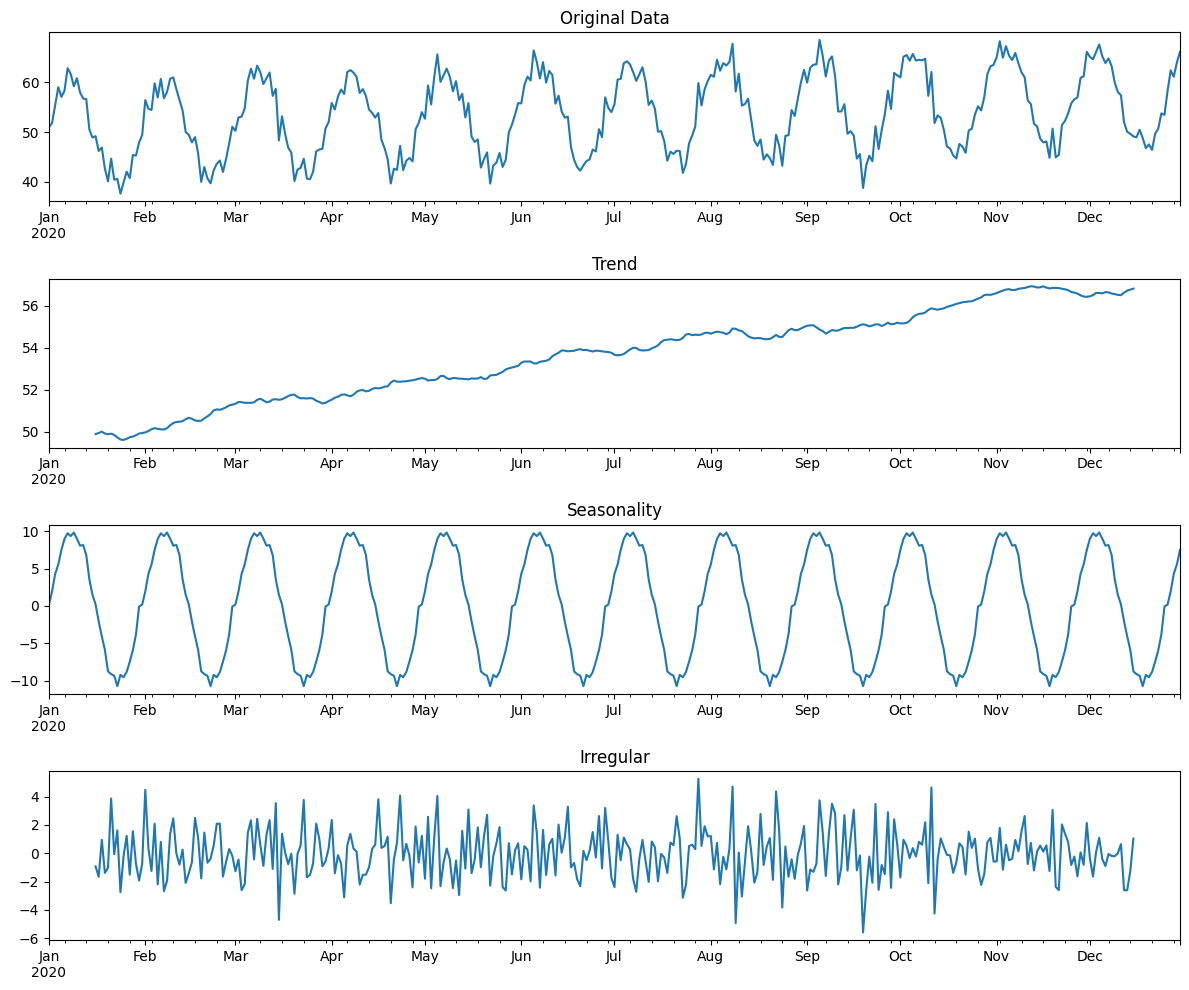

In [3]:
# 시계열 성분 분해 실습
decomposition = seasonal_decompose(stock_ts, model="additive", period=30)

# 시각화
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=ax1)
ax1.set_title("Original Data")
decomposition.trend.plot(ax=ax2)
ax2.set_title("Trend")
decomposition.seasonal.plot(ax=ax3)
ax3.set_title("Seasonality")
decomposition.resid.plot(ax=ax4)
ax4.set_title("Irregular")
plt.tight_layout()

## ACF vs PACF

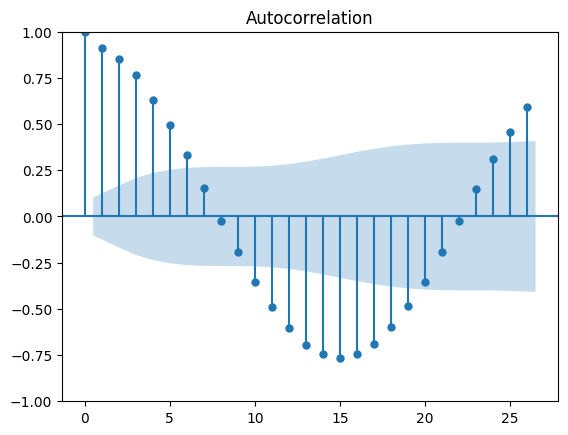

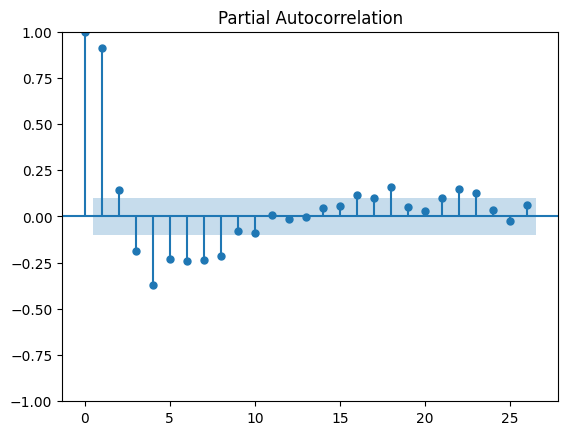

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf


# 함수로서의 ACF 사용
acf_values = acf(stock_ts, nlags=10)  # 시차 0~10까지의 ACF값 반환

# 시각화 함수
plot_acf(stock_ts)  # ACF 플롯 그리기
plot_pacf(stock_ts)  # PACF 플롯 그리기
plt.show()